# Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
w_df = pd.DataFrame()
w_data = open('water.csv', 'r', encoding='utf-8')
fields = next(w_data)
fields = fields.split(',')
for i in range(len(fields)):
    fields[i] = fields[i].strip().replace('"','')
for line in w_data: 
    line = line.split(',')
    for i in range(len(line)):
        line[i] = line[i].strip().replace('"','')
    row = {fields[1] : line[1], fields[2] : line[2], fields[3] : int(line[3]), fields[4] : int(line[4])}
    w_df = pd.concat([w_df, pd.DataFrame([row])])
w_df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
0,North,Birkenhead,1668,17
0,South,Birmingham,1466,5
0,North,Blackburn,1800,14
0,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

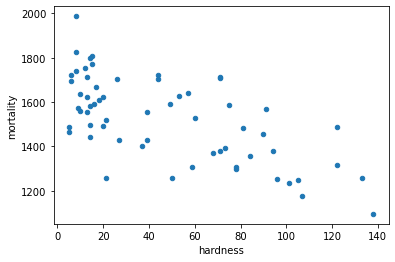

In [3]:
# построим точеченый график 
w_df.plot(kind = 'scatter', y = 'mortality', x = 'hardness')

In [3]:
# Рассчитаем коэффициент корреляции Пирсона
w_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [4]:
#Рассчитать коэффициенты корреляции Спирмена
w_df[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [59]:
# Построим модель линейной регрессии
x = w_df[['hardness']]
y = w_df['mortality']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# определяем коэф. детерминации
model.score(X_test, y_test)

0.5099679408034544

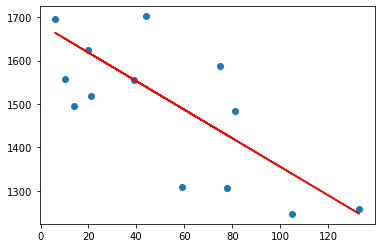

In [61]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c ='r')

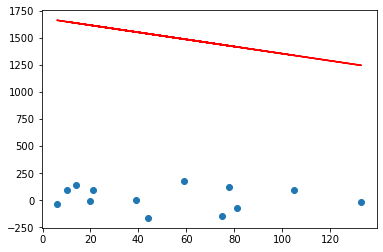

In [62]:
plt.scatter(X_test, y_pred - y_test)
plt.plot(X_test, y_pred, c ='r')

# Ответ: По графикам можем сделать вывод что смертность выше там где жесткость воды ниже. 

# Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?


# Проверяем южную часть

In [43]:
s_df = w_df.loc[w_df['location'] == 'South']
s_df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
0,South,Birmingham,1466,5
0,South,Bournemouth,1299,78
0,South,Brighton,1359,84
0,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

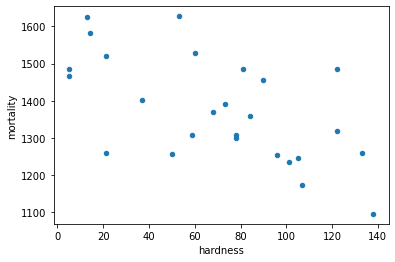

In [44]:
# построим точеченый график 
s_df.plot(kind = 'scatter', y = 'mortality', x = 'hardness')

In [45]:
# Рассчитаем коэффициент корреляции Пирсона
s_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [46]:
#Рассчитать коэффициенты корреляции Спирмена
s_df[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [63]:
# Построим модель линейной регрессии
x = s_df[['hardness']]
y = s_df['mortality']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# определяем коэф. детерминации
model.score(X_test, y_test)

-1.9300174406554644

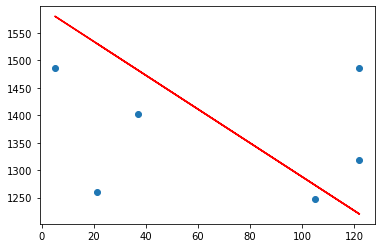

In [65]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c ='r')

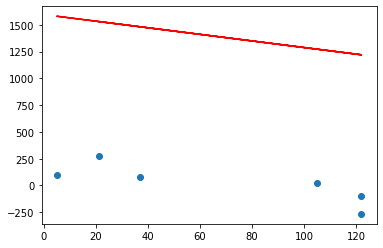

In [66]:
plt.scatter(X_test, y_pred - y_test)
plt.plot(X_test, y_pred, c ='r')

# Проверяем северную часть

In [51]:
n_df = w_df.loc[w_df['location'] == 'North']
n_df.head()

,location,town,mortality,hardness
0,North,Birkenhead,1668,17
0,North,Blackburn,1800,14
0,North,Blackpool,1609,18
0,North,Bolton,1558,10
0,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

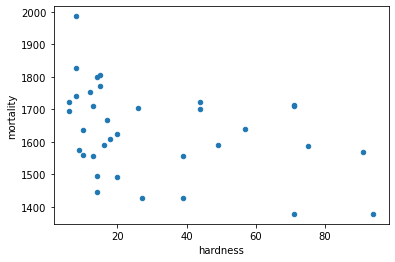

In [52]:
# построим точеченый график 
n_df.plot(kind = 'scatter', y = 'mortality', x = 'hardness')

In [67]:
# Рассчитаем коэффициент корреляции Пирсона
n_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [54]:
#Рассчитать коэффициенты корреляции Спирмена
n_df[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [68]:
# Построим модель линейной регрессии
x = n_df[['hardness']]
y = n_df['mortality']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# определяем коэф. детерминации
model.score(X_test, y_test)

-0.18101539518829401

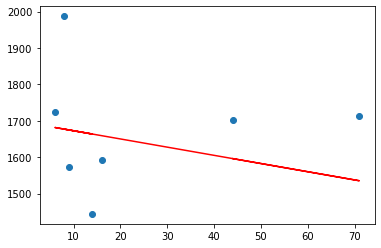

In [70]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c ='r')

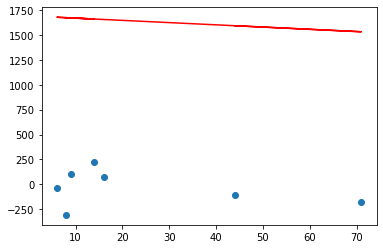

In [71]:
plt.scatter(X_test, y_pred - y_test)
plt.plot(X_test, y_pred, c ='r')

# Ответ: Для южных городов смертность немного ниже относительно северных городов, но зависимость от жесткости имеет тот же характер.